# **Loading the Dataset**

In [1]:
import pandas as pd

In [2]:
X_path = '../input/heart-disease-uci/heart.csv'
X = pd.read_csv(X_path)
X.index.name = 'Id'

In [3]:
X.shape

(303, 14)

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,,,,,,,,,,,,,,
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# **Data Visualization**

In [6]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

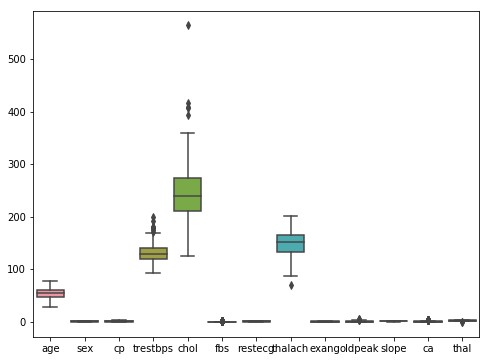

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=X.drop(['target'], axis=1))

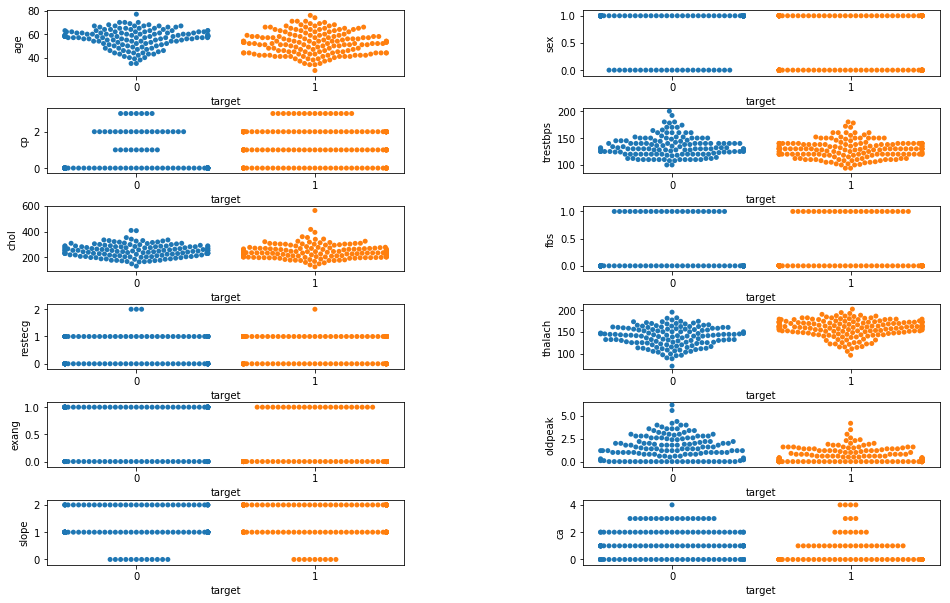

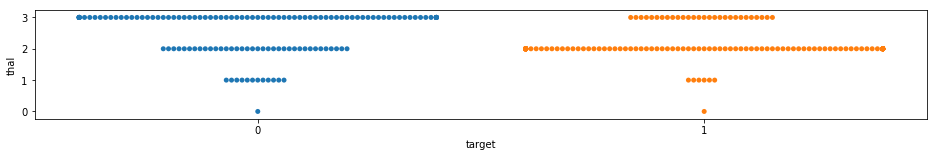

In [8]:
fig = plt.figure()
fig.set_size_inches(16,12)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
list_of_y = [i for i in X.columns]
for i in range(1,13):
    ax = fig.add_subplot(7,2,i)
    sns.swarmplot(x='target', y=list_of_y[i-1], data=X, ax=ax)
plt.show()
plt.figure(figsize=(16,2))
sns.swarmplot(x='target', y='thal', data=X)

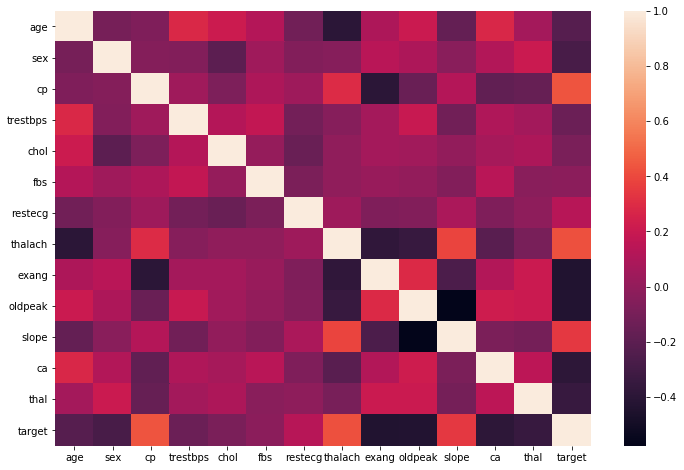

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr())

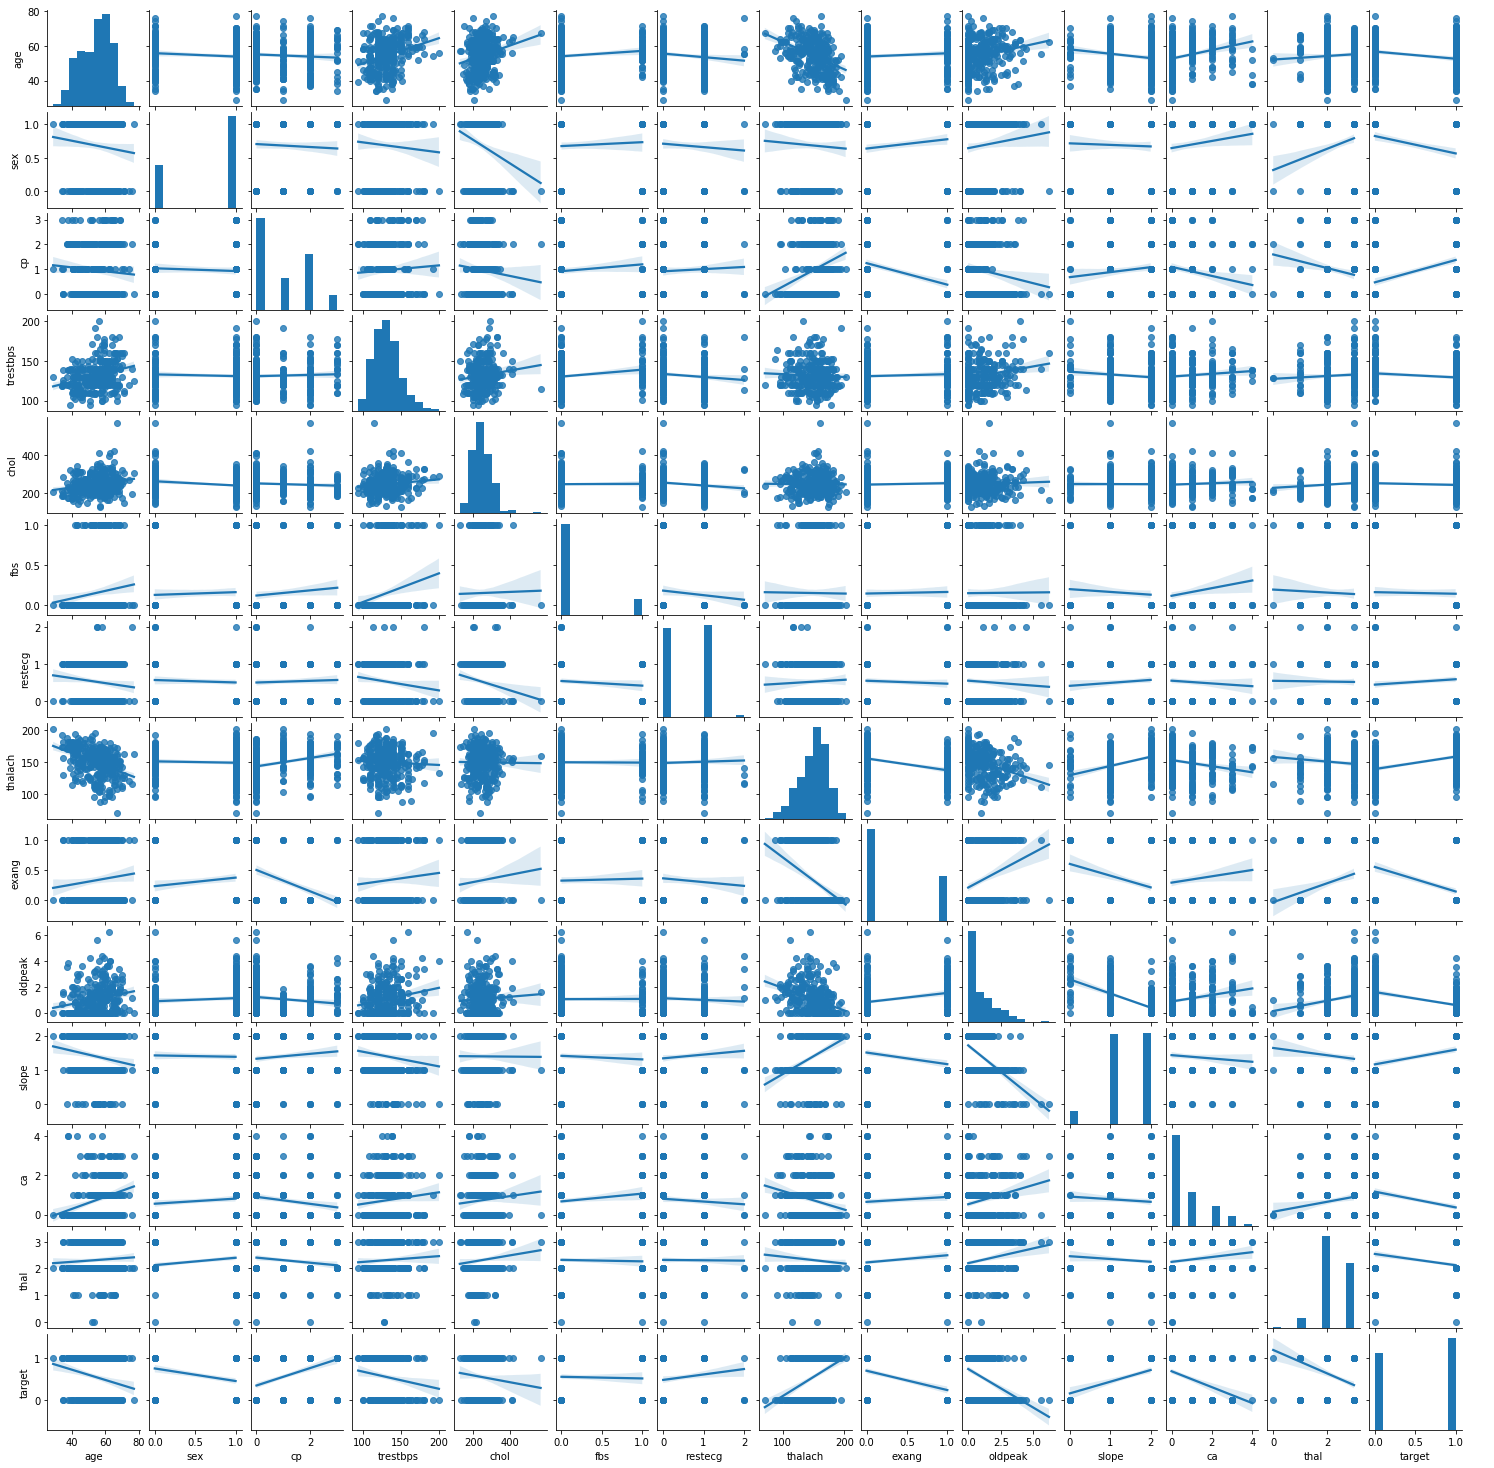

In [10]:
g = sns.pairplot(X, kind='reg')
g.fig.set_size_inches(20,20)

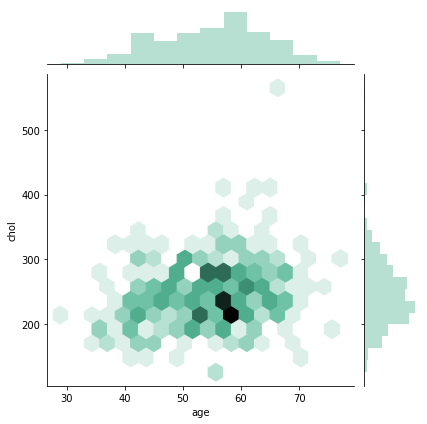

In [11]:
sns.jointplot(x=X['age'], y=X['chol'], kind='hex', color='#4CB391')

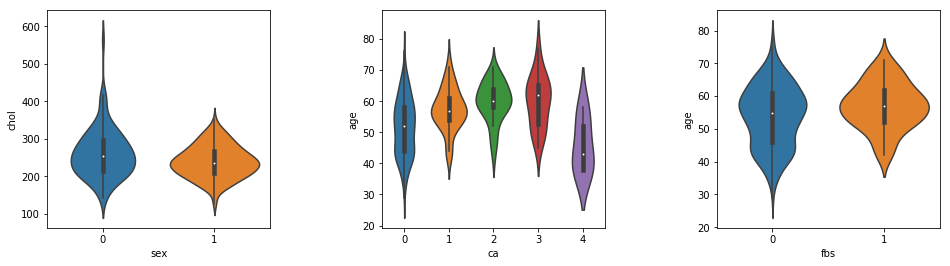

In [12]:
fig = plt.figure()
fig.set_size_inches(16,4)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(1,3,1)
sns.violinplot(x='sex', y='chol', data=X)

ax = fig.add_subplot(1,3,2)
sns.violinplot(x='ca', y='age', data=X)

ax = fig.add_subplot(1,3,3)
sns.violinplot(x='fbs', y='age', data=X)

# **Training the Model**

In [13]:
#Separating target from features
y = X.target
X.drop(['target'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split

#Splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [14]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Defining the models
xgb_model = XGBClassifier(n_estimator=1000)
lgb_model = LGBMClassifier(n_estimators=1000, learning_rate=0.01)
rf_model = RandomForestClassifier(n_estimators=1000)
mlp_model = MLPClassifier(hidden_layer_sizes=(80,80,80), max_iter=10000)

In [15]:
#Training the models
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

#Printing the scores of the models
print("XGBoost Score     : ",xgb_model.score(X_valid, y_valid))
print("LightGBM Score    : ",lgb_model.score(X_valid, y_valid))
print("RandomForest Score: ",rf_model.score(X_valid, y_valid))
print("MLP Score         : ",mlp_model.score(X_valid, y_valid))

XGBoost Score     :  0.8524590163934426
LightGBM Score    :  0.819672131147541
RandomForest Score:  0.8688524590163934
MLP Score         :  0.6885245901639344


# **Ensembling**

In [16]:
from sklearn.ensemble import StackingClassifier

estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('rf', rf_model), ('mlp', mlp_model)]

clf = StackingClassifier(estimators=estimators)
clf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimator=1000,
                                              n_estimators=100, n_jobs=1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              re...
                       

In [17]:
print("Ensemble Score: ",clf.score(X_valid, y_valid))

Ensemble Score:  0.8524590163934426
